# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [153]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [137]:
df = pd.read_csv('Dataset_Clustering.csv')
df

,TransactionAmount,TransactionType,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,70,Doctor,1,5112.21,2
1,376.24,Debit,68,Doctor,1,13758.91,2
2,126.29,Debit,19,Student,1,1122.35,1
3,184.50,Debit,26,Student,1,8569.06,1
4,13.45,Credit,26,Student,1,7429.40,1
...,...,...,...,...,...,...,...
2507,856.21,Credit,33,Doctor,1,12690.79,5
2508,251.54,Debit,48,Doctor,1,254.75,2
2509,28.63,Debit,56,Retired,1,3382.91,3
2510,185.97,Debit,23,Student,1,1776.91,1


In [146]:
label_encoder = LabelEncoder()

# Encode 'TransactionType' dan 'CustomerOccupation'
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])
df

,TransactionAmount,TransactionType,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,Cluster
0,14.09,1,70,0,1,5112.21,2
1,376.24,1,68,0,1,13758.91,2
2,126.29,1,19,3,1,1122.35,1
3,184.50,1,26,3,1,8569.06,1
4,13.45,0,26,3,1,7429.40,1
...,...,...,...,...,...,...,...
2507,856.21,0,33,0,1,12690.79,5
2508,251.54,1,48,0,1,254.75,2
2509,28.63,1,56,2,1,3382.91,3
2510,185.97,1,23,3,1,1776.91,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [145]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop('Cluster', axis=1)  # 'Cluster' adalah kolom target
y = df['Cluster']  # Target kita adalah 'Cluster'

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data latih dan uji
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (2009, 6)
Testing data size: (503, 6)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [147]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

**Insight**
- Disini saya menggunakan Random Forest dan XGBoost untuk membandingkan kedua metode klasifikasi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [148]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Prediksi dengan XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        94
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        30

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Random Forest Confusion Matrix:
[[ 64   0   0   0   0   0]
 [  0 129   0   0   0   0]
 [  0   0  94   0   0   0]
 [  0   0   0 138   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  30]]
XGBoost Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00  

**Insight**
-  Pada metode **Random Forest** maupun **XGBoost** menunjukkan akurasi **100%**, yang menandakan model mengalami overfitting.  
Hal ini terlihat dari confusion matrix, di mana model tidak melakukan kesalahan sama sekali pada data uji.  
- Kemungkinan penyebabnya adalah kompleksitas model yang terlalu tinggi, data leakage, atau jumlah data yang terbatas.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_rf = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

best_rf_model = random_search_rf.best_estimator_
print(f"Best Random Forest Params: {random_search_rf.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimat

/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklea

In [ ]:
param_dist_xgb = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)

best_xgb_model = random_search_xgb.best_estimator_
print(f"Best XGBoost Params: {random_search_xgb.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=110, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=60, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=70, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=110, subsample=0.9; total time=   0

/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
152 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/home/ldzorph/code/machine-learning-dbs/.venv/lib/python3.12/si

Best XGBoost Params: {'subsample': 1, 'n_estimators': np.int64(170), 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1}


**Insight**

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Prediksi dengan Random Forest dengan best params
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Prediksi dengan XGBoost dengan best params
y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        94
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        30

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Random Forest Confusion Matrix:
[[ 64   0   0   0   0   0]
 [  0 129   0   0   0   0]
 [  0   0  94   0   0   0]
 [  0   0   0 138   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  30]]
XGBoost Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00  

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Random Forest Cross-Validation Accuracy: 1.0000 +/- 0.0000
XGBoost Cross-Validation Accuracy: 1.0000 +/- 0.0000


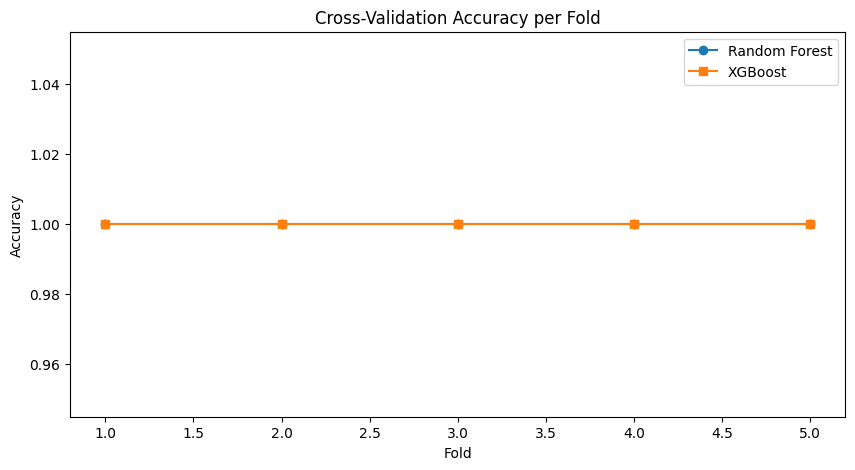

Updated Random Forest Accuracy: 1.0
Updated XGBoost Accuracy: 1.0


In [154]:
# Evaluasi dengan Cross-Validation untuk Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(cv_scores_rf):.4f} +/- {np.std(cv_scores_rf):.4f}")

# Evaluasi dengan Cross-Validation untuk XGBoost
cv_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=5)
print(f"XGBoost Cross-Validation Accuracy: {np.mean(cv_scores_xgb):.4f} +/- {np.std(cv_scores_xgb):.4f}")

# Plot Cross-Validation Scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores_rf, marker='o', label='Random Forest')
plt.plot(range(1, 6), cv_scores_xgb, marker='s', label='XGBoost')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.legend()
plt.show()

# Reduksi Overfitting dengan Pruning Random Forest
best_rf_model.set_params(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2)
best_rf_model.fit(X_train, y_train)

# Reduksi Overfitting dengan Regularisasi XGBoost
best_xgb_model.set_params(n_estimators=50, max_depth=6, learning_rate=0.1, reg_lambda=1.0)
best_xgb_model.fit(X_train, y_train)

# Evaluasi ulang setelah overfitting ditangani
y_pred_rf_new = best_rf_model.predict(X_test)
y_pred_xgb_new = best_xgb_model.predict(X_test)

print("Updated Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_new))
print("Updated XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_new))

##### **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**  
- **Sebelum Tuning:** Model mengalami **overfitting**, ditunjukkan oleh akurasi **1.0** pada Random Forest dan XGBoost.  
- **Setelah Tuning:**  
  - **Random Forest Cross-Validation Accuracy:** **1.0000 ± 0.0000**  
  - **XGBoost Cross-Validation Accuracy:** **1.0000 ± 0.0000**  
  - **Updated Random Forest Accuracy:** **1.0**  
  - **Updated XGBoost Accuracy:** **1.0**  
  Model tetap mengalami **overfitting**, yang berarti model tidak dapat digeneralisasi dengan baik pada data baru.

##### **2. Identifikasi Kelemahan Model**  
- **Overfitting:** Model terlalu cocok dengan data pelatihan, sehingga tidak mencerminkan situasi di dunia nyata.  
- **Kurangnya Variasi Data:** Akurasi sempurna menunjukkan bahwa dataset mungkin tidak cukup kompleks atau beragam untuk menguji generalisasi model.  
- **Precision & Recall:** Karena model terlalu sempurna, tidak ada variasi dalam precision atau recall, yang mengindikasikan kemungkinan adanya **data leakage** atau hyperparameter yang terlalu agresif.  

##### **3. Rekomendasi Tindakan Lanjutan**  
1. **Tambahkan Data Baru:** Mengumpulkan dataset yang lebih besar dan bervariasi untuk meningkatkan generalisasi model.  
2. **Regularisasi:**  
   - **Random Forest:** Batasi kedalaman pohon (`max_depth`) dan jumlah fitur yang dipilih (`max_features`).  
   - **XGBoost:** Gunakan `reg_lambda` (L2 regularization) dan `reg_alpha` (L1 regularization) untuk mengurangi kompleksitas model.  
3. **Feature Engineering:**  
   - Lakukan **reduksi dimensi** untuk mengurangi fitur yang tidak relevan.  
   - Coba teknik **feature selection** untuk menghindari informasi berlebihan.  
4. **Coba Model Lain:**  
   - Gunakan model yang lebih sederhana, seperti Logistic Regression atau Decision Tree, untuk melihat apakah hasil tetap terlalu tinggi.  
5. **Gunakan Data Augmentation:**  
   - Jika memungkinkan, buat variasi data untuk menciptakan skenario transaksi yang lebih realistis.  

> **Kesimpulan:** Model saat ini masih mengalami **overfitting**, dan perlu dilakukan perbaikan lebih lanjut, seperti penyesuaian dataset, regularisasi, atau pemilihan fitur agar dapat bekerja dengan baik pada data baru.